In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
''' train and test path '''
train_path = '../input/brain-tumor-classification-mri/Training'
test_path = '../input/brain-tumor-classification-mri/Testing'

In [3]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


In [4]:
''' reading images '''

train_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}

count=0

for f in os.listdir(tarin_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])     
    count=count+1

In [5]:
test_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for f in os.listdir(test_path):
    ''' joining path '''
    path=os.path.join(test_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling '''
        img = img/255.0
        ''' appending an image to test_data'''
        test_data.append([img, count])         
    count=count+1

In [6]:
train_images, train_labels = zip(*train_data)
test_images, tese_labels = zip(*test_data)

In [7]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_label)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

(2870, 150, 150, 3)
(2870, 4)


In [8]:
''' converting labels into to_categorical '''
test_labels = to_categorical(test_labels)

''' coverting test_images into numpy array '''
test_images = np.array(test_images)

''' converting train_labesl into numpy array '''
test_labels = np.array(test_labels)

''' shaep of test_images and test_labels '''
print(test_images.shape)
print(test_labels.shape)

(394, 150, 150, 3)
(394, 4)


In [9]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3)
test_images = test_images.reshape(-1,150,150,3)

In [10]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_lables, test_size=0.2,random_state=44)

In [11]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [12]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [13]:
''' DenseNet201 Model '''
model1 = tf.keras.applications.DenseNet201(input_shape=(150,150,3),include_top=False,weights='imagenet',pooling='avg')

''' freezing layers '''
model1.trainable = False

74842112/74836368 [==============================] - 4s 0us/step


In [14]:
inp = model1.input
''' Hidden Layer '''
x = tf.keras.layers.Dense(128, activation='relu')(model1.output)
''' Classification Layer '''
out = tf.keras.layers.Dense(4, activation='softmax')(x)

''' Model '''
model = tf.keras.Model(inputs=inp, outputs=out)

''' compile the model '''
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
''' training '''
history = model.fit(data_aug.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
72/72 [==============================] - 38s 288ms/step - loss: 1.1214 - accuracy: 0.5653 - val_loss: 0.7292 - val_accuracy: 0.7631
Epoch 2/30
72/72 [==============================] - 14s 199ms/step - loss: 0.5557 - accuracy: 0.7859 - val_loss: 0.5839 - val_accuracy: 0.7822
Epoch 3/30
72/72 [==============================] - 15s 211ms/step - loss: 0.4986 - accuracy: 0.8140 - val_loss: 0.6281 - val_accuracy: 0.8066
Epoch 4/30
72/72 [==============================] - 14s 201ms/step - loss: 0.4396 - accuracy: 0.8313 - val_loss: 0.5376 - val_accuracy: 0.8310
Epoch 5/30
72/72 [==============================] - 15s 207ms/step - loss: 0.4163 - accuracy: 0.8318 - val_loss: 0.4621 - val_accuracy: 0.8537
Epoch 6/30
72/72 [==============================] - 14s 199ms/step - loss: 0.3940 - accuracy: 0.8581 - val_loss: 0.5493 - val_accuracy: 0.8432
Epoch 7/30
72/72 [==============================] - 15s 213ms/step - loss: 0.3655 - accuracy: 0.8685 - val_loss: 0.5400 - val_accuracy: 0.8118

In [16]:
''' prediction '''
y_pred=model.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

''' classificaion report '''
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        81
           1       0.81      0.97      0.88       157
           2       0.90      0.71      0.79       170
           3       0.89      0.87      0.88       166

    accuracy                           0.86       574
   macro avg       0.86      0.87      0.86       574
weighted avg       0.87      0.86      0.86       574



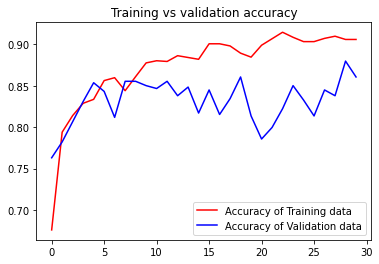

<Figure size 432x288 with 0 Axes>

In [17]:
''' training accuracy and validation accuracy graph '''
epochs = range(len(get_acc))
plt.plot(epochs, history.history['accuracy'], 'r', label='Accuracy of Training data')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

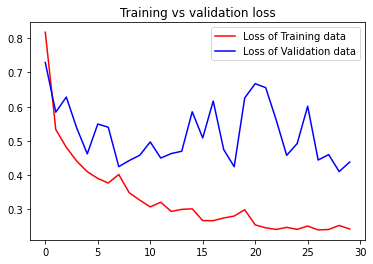

<Figure size 432x288 with 0 Axes>

In [18]:
''' training loss and validation loss graph '''
epochs = range(len(get_loss))
plt.plot(epochs, history.history['loss'], 'r', label='Loss of Training data')
plt.plot(epochs, history.history['val_loss'], 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

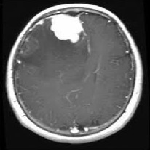

In [19]:
''' loading an image '''
load_img("../input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(112).jpg",target_size=(150,150))

In [20]:
''' predicion on new data '''

''' loading an image '''
img = load_img("../input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(112).jpg",target_size=(150,150))

''' converting img to array '''
img = img_to_array(img) 

''' scaling '''
img = img / 255.0

''' expanding dimensions '''
img = np.expand_dims(img, axis=0)

In [21]:
lbl_encoding = {0:'no_tumor', 1:'pituitary_tumor', 2:'meningioma_tumor', 3:'glioma_tumor'}

def map_label(val):
    return lbl_encoding[val]

''' predicion '''
pred = model.predict(prediction_image)

''' retreiving max val from predited values'''
val = np.argmax(pred)
map_val  = map_label(val)

print("Prediction is {}.".format(map_val))

Prediction is meningioma_tumor.


In [22]:
''' checing shape of test_images '''
print(test_images.shape)

''' predicion on test_images '''
preds2 = model.predict(test_images)

''' checking shape of predicted value'''
print(preds2.shape)

prediction = []
for p in preds2:
    ''' retreiving max val'''
    val2 = np.argmax(p)      
    prediction += [val2]

(394, 150, 150, 3)
(394, 4)


In [23]:
actual2 = =test_labels

In [24]:
''' checking accuracy score'''
accuracy = accuracy_score(actual2, prediction)
print(accuracy)

0.7182741116751269
